In [1]:
import pandas as pd # import and manage datasets
import numpy as np # mathematic library
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA

In [2]:
# forecast for investment

In [3]:
Investment_forcast_India = pd.read_excel("Investment_per_tech_India.xlsx")

In [4]:
Investment_forcast_India

,Year,Code,Investment in Renewables by Region,investment_solar,investment_wind,investment_marine,investment_geo,investment_hydro,investment_biofuel,investment_biomass
0,2004,IND,2710000000,6.457872e+08,1.130128e+09,0.000000e+00,6.919149e+07,1.556809e+08,2.306383e+08,4.785745e+08
1,2005,IND,3030000000,6.617720e+08,1.186195e+09,4.162088e+06,4.994505e+07,3.079945e+08,4.120467e+08,4.078846e+08
2,2006,IND,4860000000,9.444011e+08,1.711996e+09,3.449867e+07,6.037267e+07,3.234250e+08,1.233327e+09,5.519787e+08
3,2007,IND,6690000000,1.633653e+09,2.565970e+09,3.359699e+07,7.139360e+07,2.687759e+08,1.150697e+09,9.659134e+08
4,2008,IND,5610000000,1.894727e+09,2.312000e+09,6.181818e+06,5.254545e+07,2.349091e+08,5.687273e+08,5.409091e+08
5,2009,IND,4280000000,1.537149e+09,1.914231e+09,7.205387e+06,6.725028e+07,1.489113e+08,2.449832e+08,3.602694e+08
6,2010,IND,8840000000,3.761084e+09,3.688476e+09,7.260780e+06,1.052813e+08,2.940616e+08,3.811910e+08,6.026448e+08
7,2011,IND,12780000000,7.039908e+09,3.826728e+09,9.089616e+06,1.772475e+08,3.408606e+08,4.817496e+08,9.044168e+08
8,2012,IND,7800000000,4.293970e+09,2.577604e+09,9.162099e+06,4.886453e+07,1.954581e+08,2.198904e+08,4.550509e+08
9,2013,IND,6560000000,3.333174e+09,2.490785e+09,5.597270e+06,8.116041e+07,1.567235e+08,1.455290e+08,3.470307e+08


In [5]:
y = list(Investment_forcast_India['investment_solar'])
x = list(Investment_forcast_India['Year'])

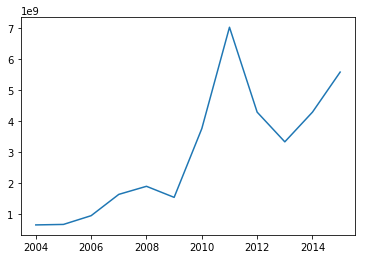

In [6]:
pyplot.plot(x, y)  

In [7]:
z1 = pd.DataFrame(x, columns = ['Year'])

In [8]:
z1['investment_solar'] = y

In [9]:
z1 = z1.set_index('Year')

In [10]:
len(z1)

12

In [11]:
from sklearn import metrics

X = z1.values
X = [int(x) for x in X]
train = X[:10]
test = X[10:]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
print("R^2:", metrics.r2_score(test, predictions))

predicted=3669688400.156828, expected=4294750089.000000
predicted=4623261739.545933, expected=5589464915.000000
R^2: -0.5799813532974167


C:\Users\pooji\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\pooji\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\pooji\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

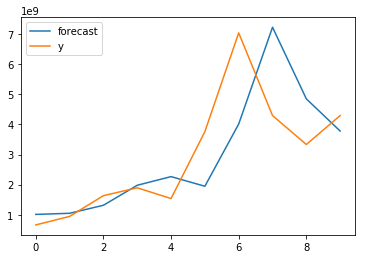

In [12]:
model_fit.plot_predict(dynamic=False)
plt.show()

C:\Users\pooji\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\pooji\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\pooji\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

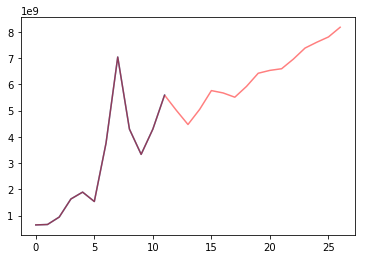

In [13]:
X = z1.values
X = [int(x) for x in X]
history = [int(x) for x in X]
predictions = list(history)

for t in range(12,27):
    model = ARIMA(history, order=(3,2,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = int(output[0])
    predictions.append(yhat)
    history.append(yhat)
# plot
pyplot.plot(X)
pyplot.plot(predictions, color='red', alpha=0.5)
pyplot.show()

In [14]:
df_investent_future = pd.DataFrame(predictions, columns = ['solar_invest_pred'])

In [15]:
df_investent_future['year'] = list(range(2004,2031))

In [16]:
df_investent_future = df_investent_future.set_index('year')

In [17]:
y1 = list(Investment_forcast_India['investment_wind'])
x1 = list(Investment_forcast_India['Year'])

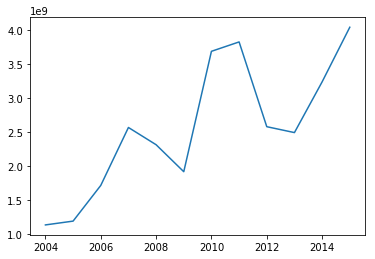

In [18]:
pyplot.plot(x1, y1)  

In [19]:
z2 = pd.DataFrame(x1, columns = ['Year'])

In [20]:
z2['investment_wind'] = y1

In [21]:
z2 = z2.set_index('Year')

In [22]:
from sklearn import metrics

X = z2.values
X = [int(x) for x in X]
train = X[:10]
test = X[10:]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(0,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
print("R^2:", metrics.r2_score(test, predictions))

predicted=3204492408.179185, expected=3238223660.000000
predicted=3710482134.247482, expected=4043165652.000000
R^2: 0.6548520907942633


C:\Users\pooji\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


C:\Users\pooji\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\pooji\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\pooji\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


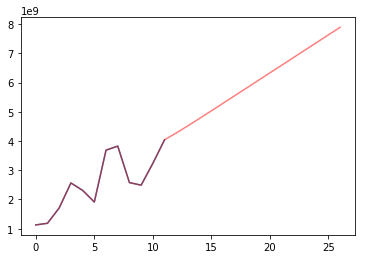

In [23]:
X = z2.values
X = [int(x) for x in X]
history = [int(x) for x in X]
predictions = list(history)

for t in range(12,27):
    model = ARIMA(history, order=(0,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = int(output[0])
    predictions.append(yhat)
    history.append(yhat)
# plot
pyplot.plot(X)
pyplot.plot(predictions, color='red', alpha=0.5)
pyplot.show()

In [24]:
df_investent_future['wind_invest_pred'] = predictions

In [25]:
df_investent_future.head()

,solar_invest_pred,wind_invest_pred
year,,
2004,645787234,1130127659
2005,661771978,1186195054
2006,944401064,1711996450
2007,1633653483,2565969868
2008,1894727272,2312000000


In [26]:
y3 = list(Investment_forcast_India['investment_hydro'])
x3 = list(Investment_forcast_India['Year'])

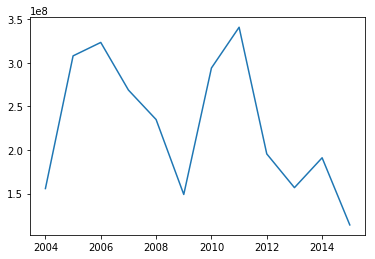

In [27]:
pyplot.plot(x3, y3)  

In [28]:
z3 = pd.DataFrame(x3, columns = ['Year'])

In [29]:
z3['investment_hydro'] = y3

In [30]:
z3 = z3.set_index('Year')

In [31]:
from sklearn import metrics

X = z3.values
X = [int(x) for x in X]
train = X[:10]
test = X[10:]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
print("R^2:", metrics.r2_score(test, predictions))

predicted=157184523.257498, expected=191010427.000000
predicted=193901888.844454, expected=113937840.000000
R^2: -1.538117100195365


C:\Users\pooji\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\pooji\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  zf = out_full[ind]


C:\Users\pooji\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\pooji\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\pooji\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

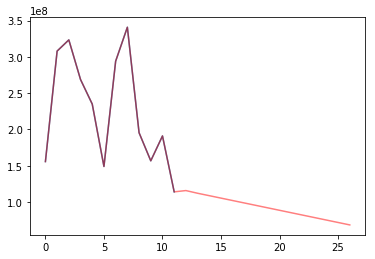

In [32]:
X = z3.values
X = [int(x) for x in X]
history = [int(x) for x in X]
predictions = list(history)

for t in range(12,27):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = int(output[0])
    predictions.append(yhat)
    history.append(yhat)
# plot
pyplot.plot(X)
pyplot.plot(predictions, color='red', alpha=0.5)
pyplot.show()

In [33]:
df_investent_future['hydro_invest_pred'] = predictions

In [34]:
df_investent_future.head()

,solar_invest_pred,wind_invest_pred,hydro_invest_pred
year,,,
2004,645787234,1130127659,155680851
2005,661771978,1186195054,307994505
2006,944401064,1711996450,323425022
2007,1633653483,2565969868,268775894
2008,1894727272,2312000000,234909090


In [35]:
x4 = list(Investment_forcast_India['Year'])
y4 = []
for i in range(len(x4)):
    y4.append(list(Investment_forcast_India['investment_geo'])[i] + list(Investment_forcast_India['investment_biomass'])[i] + list(Investment_forcast_India['investment_biofuel'])[i])

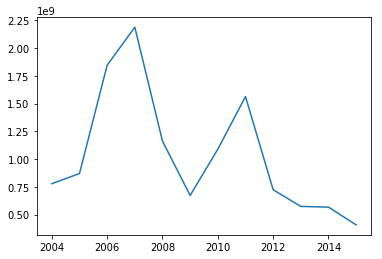

In [36]:
pyplot.plot(x4, y4)  

In [37]:
z4 = pd.DataFrame(x4, columns = ['Year'])

In [38]:
z4['investment_other'] = y4

In [39]:
z4 = z4.set_index('Year')

In [40]:
from sklearn import metrics

X = z4.values
X = [int(x) for x in X]
train = X[:10]
test = X[10:]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
print("R^2:", metrics.r2_score(test, predictions))

predicted=541317507.619397, expected=567062207.000000
predicted=547025403.881941, expected=406920858.000000
R^2: -0.5825208964509543


C:\Users\pooji\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\pooji\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\pooji\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

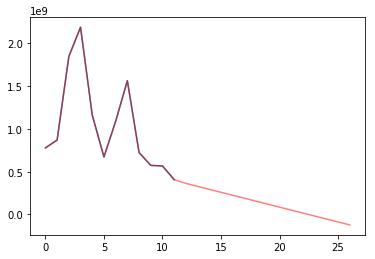

In [41]:
X = z4.values
X = [int(x) for x in X]
history = [int(x) for x in X]
predictions = list(history)

for t in range(12,27):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = int(output[0])
    predictions.append(yhat)
    history.append(yhat)
# plot
pyplot.plot(X)
pyplot.plot(predictions, color='red', alpha=0.5)
pyplot.show()

In [42]:
df_investent_future['other_invest_pred'] = predictions

In [43]:
y5 = list(Investment_forcast_India['Investment in Renewables by Region'])
x5 = list(Investment_forcast_India['Year'])

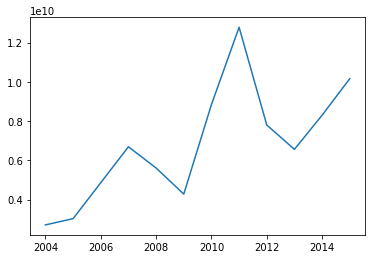

In [44]:
pyplot.plot(x5, y5)  

In [45]:
z5 = pd.DataFrame(x5, columns = ['Year'])

In [46]:
z5['investment_total'] = y5

In [47]:
z5 = z5.set_index('Year')

In [48]:
from sklearn import metrics

X = z5.values
X = [int(x) for x in X]
train = X[:10]
test = X[10:]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(0,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
print("R^2:", metrics.r2_score(test, predictions))

predicted=8846238790.331493, expected=8300000000.000000
predicted=9949170704.009136, expected=10160000000.000000
R^2: 0.8018118810782654


C:\Users\pooji\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


C:\Users\pooji\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\pooji\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:676: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\pooji\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\pooji\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\pooji\Anaconda3\lib\site-packages\statsmodels\tsa\ka

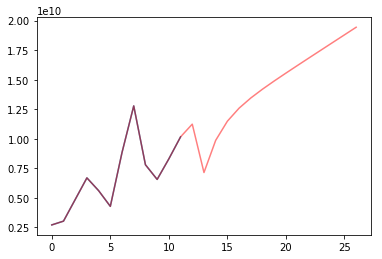

In [49]:
X = z5.values
X = [int(x) for x in X]
history = [int(x) for x in X]
predictions = list(history)

for t in range(12,27):
    model = ARIMA(history, order=(0,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    
    if type(output[0]) == int:
        k = int(output[0])
    else:
        k = np.nan_to_num(output[0])
        if k == 0:
            k = np.mean(predictions)
    
    yhat = int(k)
    predictions.append(yhat)
    history.append(yhat)
# plot
pyplot.plot(X)
pyplot.plot(predictions, color='red', alpha=0.5)
pyplot.show()

In [50]:
df_investent_future['T_invest_pred'] = predictions

In [51]:
df_investent_future.to_excel("investment_growth_forecast_2004-2030_India.xlsx")

In [52]:
df_investent_future

,solar_invest_pred,wind_invest_pred,hydro_invest_pred,other_invest_pred,T_invest_pred
year,,,,,
2004,645787234,1130127659,155680851,778404255,2710000000
2005,661771978,1186195054,307994505,869876373,3030000000
2006,944401064,1711996450,323425022,1845678793,4860000000
2007,1633653483,2565969868,268775894,2188003766,6690000000
2008,1894727272,2312000000,234909090,1162181818,5610000000
2009,1537149270,1914231200,148911335,672502805,4280000000
2010,3761084188,3688476386,294061601,1089117043,8840000000
2011,7039907539,3826728307,340860597,1563413940,12780000000
2012,4293970242,2577603758,195458104,723805794,7800000000
